*****DNN Example for Fashion MNIST Dataset*****

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization,Dropout

from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

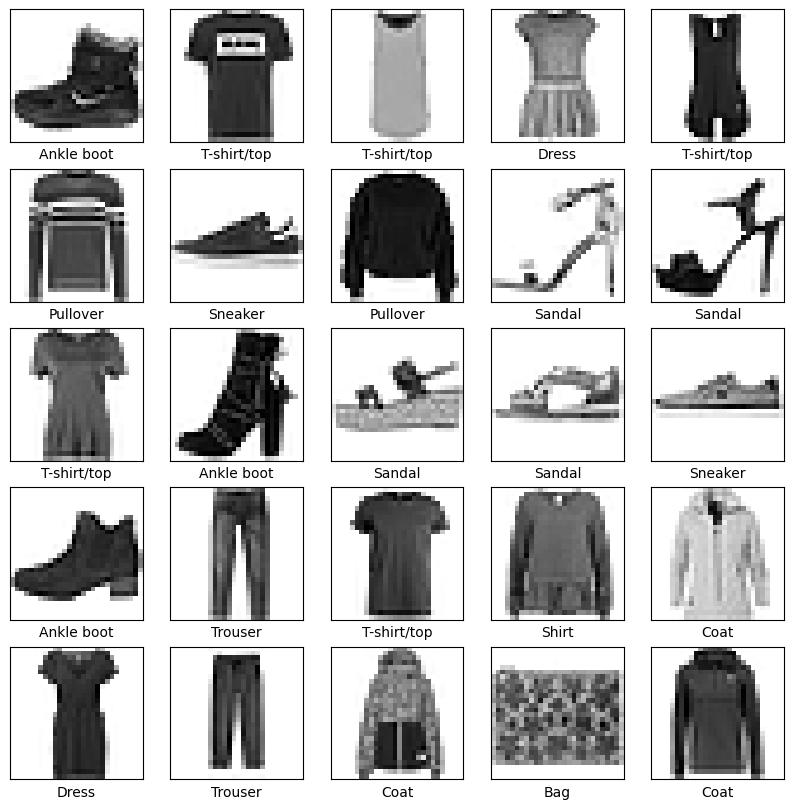

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Add, Activation, Flatten
from tensorflow.keras.utils import to_categorical

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Flatten the images for DNN
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

# Visualize some samples
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.show()

In [5]:
def create_dnn():
    inputs = Input(shape=(784,))
    x = Dense(512, activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)


    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)

    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)

    x = Dense(64, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.1)(x)

    outputs = Dense(10, activation='softmax')(x)
    return Model(inputs, outputs)

In [6]:
def create_resnet_dnn():
    inputs = Input(shape=(784,))
    

    x = Dense(256)(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.4)(x)


    x1 = Dense(256)(x)
    x1 = BatchNormalization()(x1)
    x1 = Activation('relu')(x1)
    x1 = Dropout(0.4)(x1)

    x2 = Dense(256)(x1)
    x2 = BatchNormalization()(x2)

    res1 = Add()([x, x2])
    res1 = Activation('relu')(res1)
    res1 = Dropout(0.3)(res1)


    x3 = Dense(128)(res1)
    x3 = BatchNormalization()(x3)
    x3 = Activation('relu')(x3)
    x3 = Dropout(0.2)(x3)

    x4 = Dense(128)(x3)
    x4 = BatchNormalization()(x4)
    res1_proj = Dense(128)(res1)
    res2 = Add()([res1_proj, x4])
    res2 = Activation('relu')(res2)
    res2 = Dropout(0.1)(res2)

    
    x5 = Dense(128)(res2)
    x5 = BatchNormalization()(x5)
    x5 = Activation('relu')(x5)
    x5 = Dropout(0.2)(x5)

    x6 = Dense(128)(x5)
    x6 = BatchNormalization()(x6)

    res2_proj = Dense(128)(res2)
    res3 = Add()([res2_proj, x6])
    res3 = Activation('relu')(res3)
    res3 = Dropout(0.1)(res3)

   
    x7 = Dense(64)(res3)
    x7 = BatchNormalization()(x7)
    x7 = Activation('relu')(x7)
    x7 = Dropout(0.1)(x7)

    x8 = Dense(64)(x7)
    x8 = BatchNormalization()(x8)

    res3_proj = Dense(64)(res3)
    res4 = Add()([res3_proj, x8])
    res4 = Activation('relu')(res4)
    res4 = Dropout(0.1)(res4)

    
    x_final = Dense(64, activation='relu')(res4)
    x_final = BatchNormalization()(x_final)
    outputs = Dense(10, activation='softmax')(x_final)
    return Model(inputs, outputs)

In [7]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

dnn_model = create_dnn()
resnet_model = create_resnet_dnn()
early = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'],)

In [8]:
dnn_history = dnn_model.fit(x_train_flat, y_train, 
                            epochs=50, 
                            batch_size=256, 
                            validation_split=0.1,
                           callbacks=[early, lr_reduce],

                            verbose=1)

resnet_history = resnet_model.fit(x_train_flat, y_train, 
                                 epochs=50, 
                                 batch_size=256, 
                                 validation_split=0.1,
                                  callbacks=[early, lr_reduce],
                                 verbose=1)

Epoch 1/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.5263 - loss: 1.3674 - val_accuracy: 0.8097 - val_loss: 0.5040 - learning_rate: 0.0010
Epoch 2/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8032 - loss: 0.5579 - val_accuracy: 0.8473 - val_loss: 0.4450 - learning_rate: 0.0010
Epoch 3/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8255 - loss: 0.4933 - val_accuracy: 0.8475 - val_loss: 0.4183 - learning_rate: 0.0010
Epoch 4/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8386 - loss: 0.4540 - val_accuracy: 0.8562 - val_loss: 0.3999 - learning_rate: 0.0010
Epoch 5/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8462 - loss: 0.4340 - val_accuracy: 0.8553 - val_loss: 0.3912 - learning_rate: 0.0010
Epoch 6/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8511 - loss: 0.4198 - val_accuracy: 0.8635 - val_loss: 0.3779 - learning_rate: 0.0010
Epoch 7/50
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8509 - loss: 0.

In [10]:
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.suptitle(title)
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    
    plt.show()

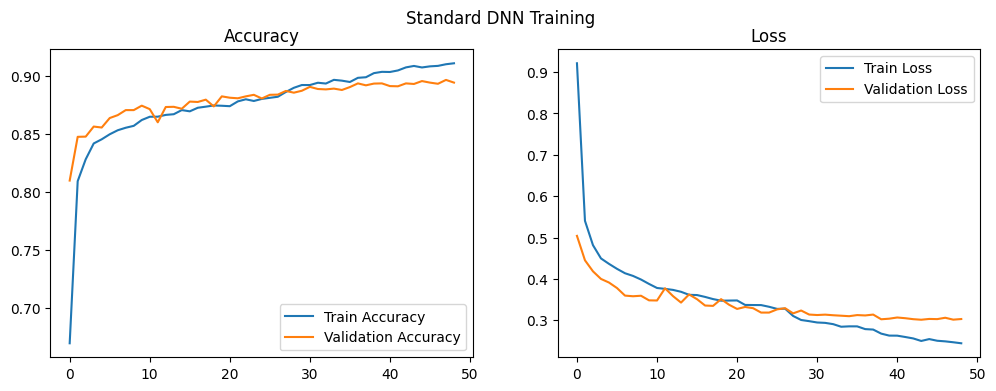

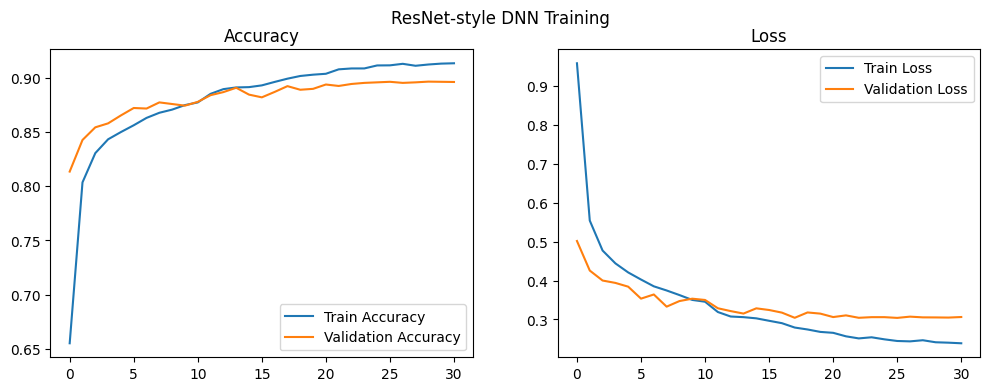

In [11]:
plot_history(dnn_history, 'Standard DNN Training')
plot_history(resnet_history, 'ResNet-style DNN Training')

In [12]:
dnn_test_loss, dnn_test_acc = dnn_model.evaluate(x_test_flat, y_test, verbose=0)
resnet_test_loss, resnet_test_acc = resnet_model.evaluate(x_test_flat, y_test, verbose=0)

In [13]:

print(f"Standard DNN Test Accuracy: {dnn_test_acc:.4f}")
print(f"ResNet-style DNN Test Accuracy: {resnet_test_acc:.4f}")

Standard DNN Test Accuracy: 0.8903
ResNet-style DNN Test Accuracy: 0.8929



Standard DNN Predictions:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


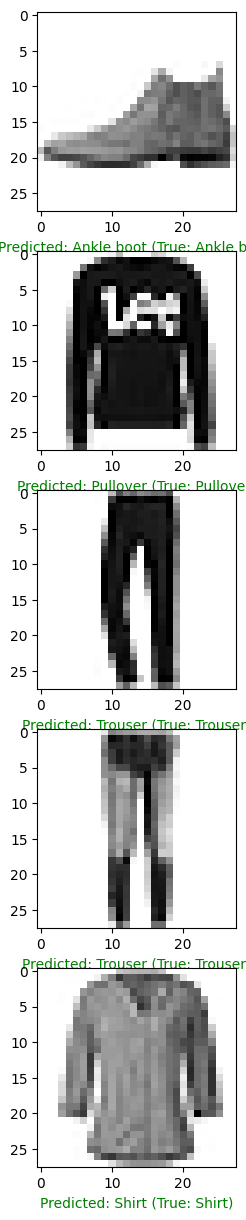


ResNet-style DNN Predictions:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


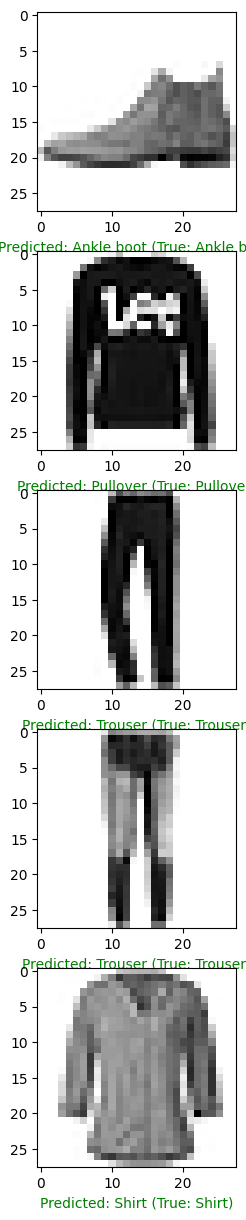

In [14]:
def plot_predictions(model, x_test, y_test, num_images=5):
    predictions = model.predict(x_test)
    plt.figure(figsize=(15, 3*num_images))
    for i in range(num_images):
        plt.subplot(num_images, 1, i+1)
        plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
        pred_label = np.argmax(predictions[i])
        true_label = np.argmax(y_test[i])
        color = 'green' if pred_label == true_label else 'red'
        plt.xlabel(f"Predicted: {class_names[pred_label]} (True: {class_names[true_label]})", color=color)
    plt.show()

print("\nStandard DNN Predictions:")
plot_predictions(dnn_model, x_test_flat, y_test)

print("\nResNet-style DNN Predictions:")
plot_predictions(resnet_model, x_test_flat, y_test)